In [1]:
import random

import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz

In [4]:
import tensorflow as tf
# from tensorflow import keras

# Data

- Obtained through: [Zoo Dataset](https://archive.ics.uci.edu/dataset/111/zoo)
- Information:
A simple database containing 17 Boolean-valued attributes.  The "type" attribute appears to be the class attribute.  Here is a breakdown of which animals are in which type: (I find it unusual that there are 2 instances of "frog" and one of "girl"!)

Forsyth, R. (1990). Zoo [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5R59V.

## Imporing

In [5]:
df = pd.read_csv('zoo/zoo.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
header = {
    "0" : "animal_name",
    "1" : "hair",
    "2" : "feathers",
    "3" : "eggs",
    "4" : "milk",
    "5" : "airborne",
    "6" : "aquatic",
    "7" : "predator",
    "8" : "toothed",
    "9" : "backbone",
    "10" : "breathes",
    "11" : "venomous",
    "12" : "fins",
    "13" : "legs",
    "14" : "tail",
    "15" : "domestic",
    "16" : "catsize",
    "17" : "type"
}
heade = {}
for x in range(len(df.columns)):
    heade[x] = header[str(x)]

In [7]:
df.rename(columns=heade, inplace=True)
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## Checking

In [8]:
# df.info()
# df.dtypes
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

## Binary Data type

In [10]:
# transfor he types of data to boolean
binary_df = df.astype('bool').astype('int')
binary_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1,1
2,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1
3,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,1
4,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,1


## Split Data: train & test

In [11]:
X = binary_df.drop(['animal_name', 'type'], axis=1).copy()
y = df[['type']].copy()
y = y[["type"]]-1 # to start from 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [12]:
classes = y["type"].unique()
classes.sort()
print(len(X.columns))
print(classes)

16
[0 1 2 3 4 5 6]


## Class names

In [13]:
class_names = {
    1: "Mammal",
    2: "Bird",
    3: "Reptile",
    4: "Fish",
    5: "Amphibian",
    6: "Bug",
    7: "Invertebrate"
}
class_names = {
    0: "Mammal",
    1: "Bird",
    2: "Reptile",
    3: "Fish",
    4: "Amphibian",
    5: "Bug",
    6: "Invertebrate"
}

# ML Aproach Clustering

[Scikit-Learn Clustering](https://scikit-learn.org/stable/modules/clustering.html#)

## Parameters

In [14]:
number_of_classes = len(class_names)
number_of_classes

7

## Cluster Kmeans

In [15]:
kmeans = KMeans(n_clusters=7,
                n_init=8,
                max_iter=500,
                verbose=False,
                random_state=42,
                algorithm="lloyd")

kmeans.fit(X)

c:\Users\JR-Ma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\JR-Ma\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(max_iter=500, n_clusters=7, n_init=8, random_state=42, verbose=False)

In [16]:
values, counts = np.unique(kmeans.labels_, return_counts=True)

print("Quantidade ", kmeans.labels_.shape)
print("Classes Definidas: ", values)
print("Quantidade de animais em cada Classe: ", counts)

Quantidade  (101,)
Classes Definidas:  [0 1 2 3 4 5 6]
Quantidade de animais em cada Classe:  [14 22 11 21 19  7  7]


In [17]:
df[["animal_name", "type"]].head()

,animal_name,type
0,aardvark,1
1,antelope,1
2,bass,4
3,bear,1
4,boar,1


In [18]:
df['pre_type'] = kmeans.predict(X) # Alocar as Classes no dataset
df[["animal_name", "type", "pre_type"]].head()

,animal_name,type,pre_type
0,aardvark,1,1
1,antelope,1,4
2,bass,4,0
3,bear,1,1
4,boar,1,1


In [19]:
df["pre_type"].value_counts()

pre_type
1    22
3    21
4    19
0    14
2    11
5     7
6     7
Name: count, dtype: int64

In [20]:
df_pretype = df.groupby(["pre_type", "type"]).count()[["animal_name"]].reset_index().copy()
df_pretype.rename(columns={"animal_name": "freq"}, inplace=True)
df_pretype

,pre_type,type,freq
0,0,3,1
1,0,4,13
2,1,1,22
3,2,6,8
4,2,7,3
5,3,2,20
6,3,3,1
7,4,1,19
8,5,7,7
9,6,3,3


In [21]:
# buscar o tipo predominante de cada classe gerada
animal_types = df["type"].unique()
animal_types = list(animal_types)
animal_types.sort()
print(animal_types)

animal_pre_types = df["pre_type"].unique()
animal_pre_types = list(animal_pre_types)
animal_pre_types.sort()
print(animal_pre_types)

[1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6]


In [22]:
def decode_pre_type(pre_type:int) -> int:
    """Define what are the cluster pre_type corresponded type"""
    selecao = df_pretype["pre_type"] == pre_type
    id_type_max = df_pretype[selecao].idxmax()["freq"]
    return df_pretype.iloc[id_type_max]["type"]

In [23]:
decoded_pre_types = {}
for pre_type in animal_pre_types:
    decoded_pre_types[f"{pre_type}"] = f"{decode_pre_type(pre_type)}"
decoded_pre_types

{'0': '4', '1': '1', '2': '6', '3': '2', '4': '1', '5': '7', '6': '5'}

In [24]:
decoded_pre_types = {}
for pre_type in animal_pre_types:
    decoded_pre_types[pre_type] = decode_pre_type(pre_type)
decoded_pre_types

{0: 4, 1: 1, 2: 6, 3: 2, 4: 1, 5: 7, 6: 5}

In [25]:
df_pretype["pre_type"].map(decoded_pre_types)

0     4
1     4
2     1
3     6
4     6
5     2
6     2
7     1
8     7
9     5
10    5
Name: pre_type, dtype: int64

In [26]:
df["predict_type"] = df["pre_type"].map(decoded_pre_types)

In [27]:
selecao = df["pre_type"] == 2
df[selecao]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,pre_type,predict_type
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,2,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,2,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6,2,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,2,6
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6,2,6
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6,2,6
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,2,6
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,2,6
88,termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6,2,6
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,2,6


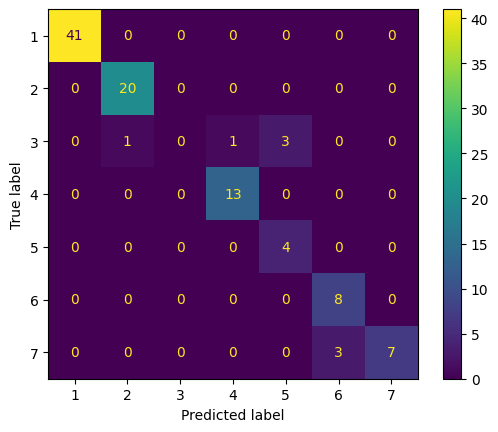

In [28]:
ConfusionMatrixDisplay.from_predictions(df["type"], df["predict_type"])
plt.show()

In [29]:
print(classification_report(df["type"], df["predict_type"], zero_division=0))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       0.95      1.00      0.98        20
           3       0.00      0.00      0.00         5
           4       0.93      1.00      0.96        13
           5       0.57      1.00      0.73         4
           6       0.73      1.00      0.84         8
           7       1.00      0.70      0.82        10

    accuracy                           0.92       101
   macro avg       0.74      0.81      0.76       101
weighted avg       0.89      0.92      0.90       101



## Spectral Clustering

technique that uses the eigenvalues of a similarity matrix to reduce dimensionality before clustering the data. It’s particularly useful when clusters are not well-separated and have complex shapes. Unlike K-Means, it doesn't assume spherical clusters, which makes it versatile in many cases.

Steps for Spectral Clustering:
- Build a similarity graph based on your data points.
- Compute the Laplacian matrix of the graph.
- Perform eigen-decomposition to get the top eigenvalues and their corresponding eigenvectors.
- Apply a clustering algorithm (like K-Means) on the resulting low-dimensional space.

In [30]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Initialize the Spectral Clustering model
spectral = SpectralClustering(n_clusters=number_of_classes, affinity='rbf', random_state=42)

# Fit the model to the data
spectral_labels = spectral.fit_predict(X)

# Evaluate the clustering using Silhouette Score
sil_score = silhouette_score(X, spectral_labels)
print(f"Spectral Clustering Silhouette Score: {sil_score}")

# Optionally, compare the cluster labels with the true class labels (if available)
# Adjusted Rand Index or Normalized Mutual Information can be used
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming you have true labels y
ari = adjusted_rand_score(y.values.flatten(), spectral_labels)
nmi = normalized_mutual_info_score(y.values.flatten(), spectral_labels)

print(f"Adjusted Rand Index: {ari}")
print(f"Normalized Mutual Information: {nmi}")


Spectral Clustering Silhouette Score: 0.40075958351995833
Adjusted Rand Index: 0.863585157478188
Normalized Mutual Information: 0.864470270730845


## Agglomerative Hierarchical Clustering

Agglomerative clustering builds a hierarchy of clusters by merging or splitting clusters based on distance metrics like Euclidean, Manhattan, or Hamming (for binary data). You can visualize the hierarchy using a dendrogram.

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize and fit the AgglomerativeClustering model
agg_cluster = AgglomerativeClustering(n_clusters=number_of_classes, metric='euclidean', linkage='ward')
agg_cluster.fit(X)

# Assign cluster labels
agg_labels = agg_cluster.labels_

# Evaluate using silhouette score
sil_score = silhouette_score(X, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {sil_score}")


Agglomerative Clustering Silhouette Score: 0.3536387953829943


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed, marking outliers as noise. It's useful if your data contains noise or clusters of varying densities.

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Initialize and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan.fit(X)

# Assign cluster labels (-1 indicates outliers)
dbscan_labels = dbscan.labels_

# Evaluate using silhouette score (Note: DBSCAN may assign outliers as -1)
sil_score = silhouette_score(X, dbscan_labels)
print(f"DBSCAN Silhouette Score: {sil_score}")


DBSCAN Silhouette Score: 0.064930772444219


## Evaluation for Clustering

For unsupervised clustering, evaluation metrics like silhouette score or Calinski-Harabasz Index are useful. If you have class labels and want to compare clusters with true labels, you can use metrics like adjusted Rand index (ARI) or normalized mutual information (NMI).

In [33]:
# from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# # Assuming you have true labels y, you can compare the cluster assignments to the ground truth
# ari = adjusted_rand_score(y, kmodes_labels)  # or kmeans_labels, agg_labels, etc.
# nmi = normalized_mutual_info_score(y, kmodes_labels)

# print(f"Adjusted Rand Index: {ari}")
# print(f"Normalized Mutual Information: {nmi}")


# ML Aproach Classification

[Scikit-Learn Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html)

## Logistic Regression

Logistic Regression is a linear model suitable for binary classification. It predicts the probability of a class (0 or 1) based on the feature values.
Pros: Simple, fast, interpretable.
Cons: Assumes linearity between features and output. It may not perform well on complex non-linear data.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



c:\Users\JR-Ma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Support Vector Machine (SVM)

SVM with a linear or non-linear kernel can work well for binary classification problems, especially when the classes are separable. SVM finds a hyperplane that separates the classes with the maximum margin. It can use different kernels (linear, polynomial, radial basis function) to capture complex relationships.
Pros: Effective in high-dimensional spaces, handles non-linear boundaries with kernels.
Cons: Can be slower to train, sensitive to tuning of hyperparameters.

can also try other kernels ('rbf', 'poly') depending on the complexity of your data.

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Support Vector Classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"SVM Classification Report: \n{classification_report(y_test, y_pred_svm)}")


SVM Accuracy: 1.0
SVM Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



c:\Users\JR-Ma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Trees

Decision trees work well with binary features as they are inherently based on decision rules (splits). Decision Trees split the data based on feature values to classify the data. This model is simple and interpretable but can overfit without proper tuning.
Pros: Can handle non-linear relationships, works well with both numerical and categorical data.
Cons: Prone to overfitting, which can be controlled using pruning or setting maximum depth.

- [Decision Tree](https://scikit-learn.org/stable/modules/tree.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Decision Tree Classification Report: \n{classification_report(y_test, y_pred_dt)}")


Decision Tree Accuracy: 0.9523809523809523
Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         3
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.90      0.93      0.89        21
weighted avg       0.98      0.95      0.96        21



--

In [37]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

modelo_tree = DecisionTreeClassifier(max_depth=3)
modelo_tree.fit(X_train, y_train)
previsoes = modelo_tree.predict(X_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 80 elementos e testaremos com 21 elementos
A acurácia foi 85.71%


In [38]:
dot_data = export_graphviz(modelo_tree, 
                           out_file=None,
                           filled = True, 
                           rounded = True,
                           feature_names = list(X.columns),
                          class_names = [str(x) for x in range(1,8)])
# necessário intalar no Path do Windows, sem permissão
# grafico = graphviz.Source(dot_data)
# grafico
# Graphviz Online
# https://dreampuf.github.io/GraphvizOnline/
# for x in dot_data.split("\n"):
#     print(x)

[Text(0.6666666666666666, 0.875, 'milk <= 0.5\ngini = 0.766\nsamples = 80\nvalue = [32, 15, 5, 10, 4, 5, 9]'),
 Text(0.5, 0.625, 'feathers <= 0.5\ngini = 0.795\nsamples = 48\nvalue = [0, 15, 5, 10, 4, 5, 9]'),
 Text(0.3333333333333333, 0.375, 'fins <= 0.5\ngini = 0.773\nsamples = 33\nvalue = [0, 0, 5, 10, 4, 5, 9]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.722\nsamples = 23\nvalue = [0, 0, 5, 0, 4, 5, 9]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 0, 10, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0, 0, 0, 0, 0]')]

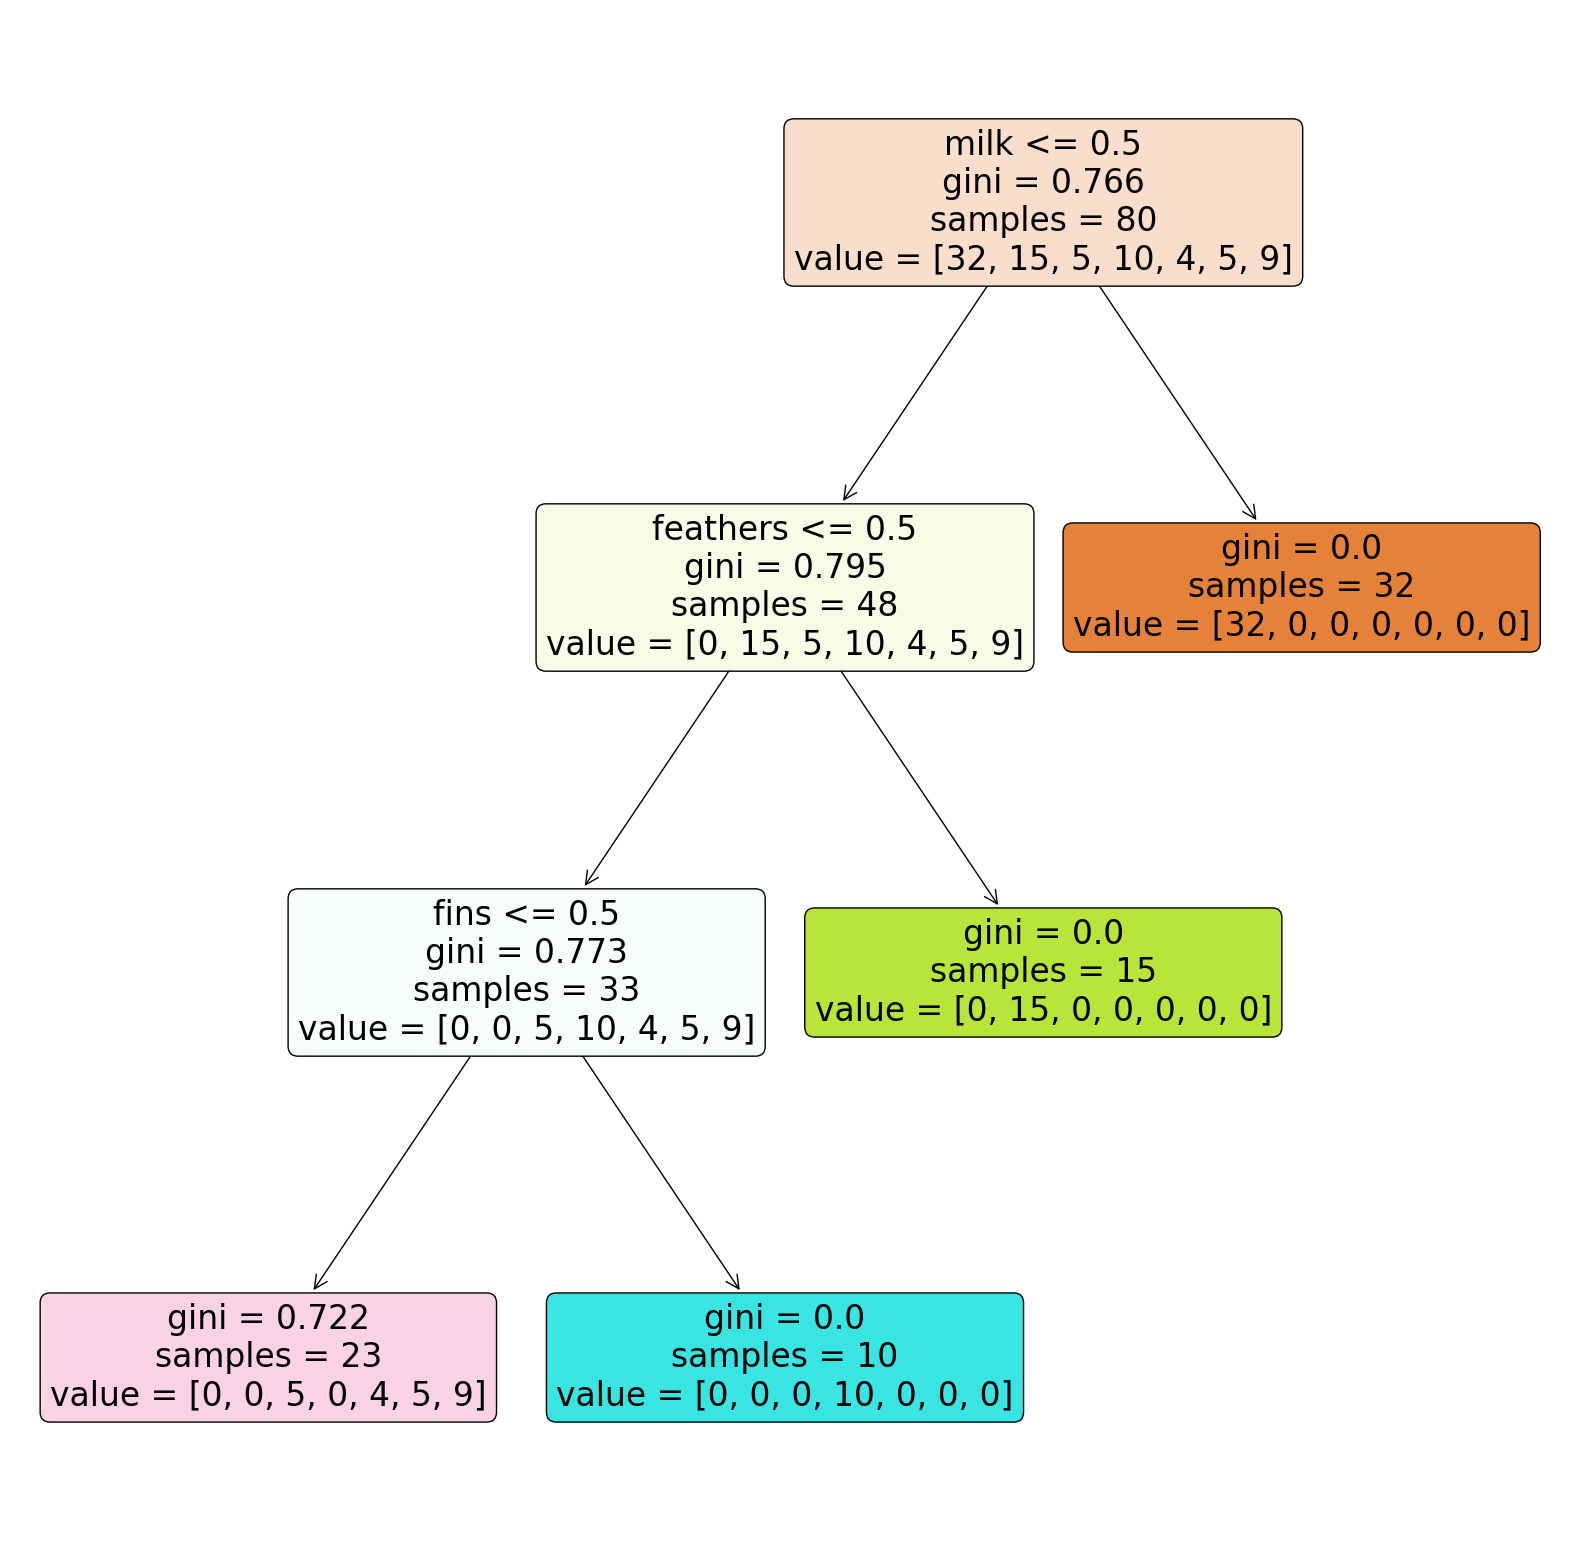

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
plot_tree(  modelo_tree,
            # out_file=None,
            filled = True, 
            rounded = True,
            feature_names = list(X.columns))

## Gradient Boosting (e.g., XGBoost, LightGBM)

Gradient boosting algorithms build an ensemble of weak learners (like decision trees) in a sequential manner to minimize the classification error. Gradient Boosting builds an ensemble of weak learners (usually decision trees) in sequence to minimize the loss function. It's a powerful method for classification tasks.
Pros: Very powerful, can capture complex relationships.
Cons: More complex to tune, slower to train.

In [40]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score, classification_report

# # Initialize and train the XGBoost classifier
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)

# # Predict on the test set
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the model
# print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
# print(f"XGBoost Classification Report: \n{classification_report(y_test, y_pred_xgb)}")


# Dimensionality reduction

[Scikit-Learn Dimensionality reduction](https://scikit-learn.org/stable/modules/decomposition.html)

- Principal Component Analysis (PCA)
- t-SNE (t-Distributed Stochastic Neighbor Embedding)
- UMAP (Uniform Manifold Approximation and Projection)
- Linear Discriminant Analysis (LDA)
- Kernel PCA (Non-linear PCA)

## Principal Component Analysis (PCA)

PCA is one of the most commonly used dimensionality reduction techniques. It transforms the data into a new coordinate system by finding the directions (principal components) that capture the most variance in the data.

When to Use PCA:
- When you want to reduce dimensionality while preserving as much variance as possible.
- For visualizing high-dimensional data in 2D or 3D.
- When the relationship between features is linear.

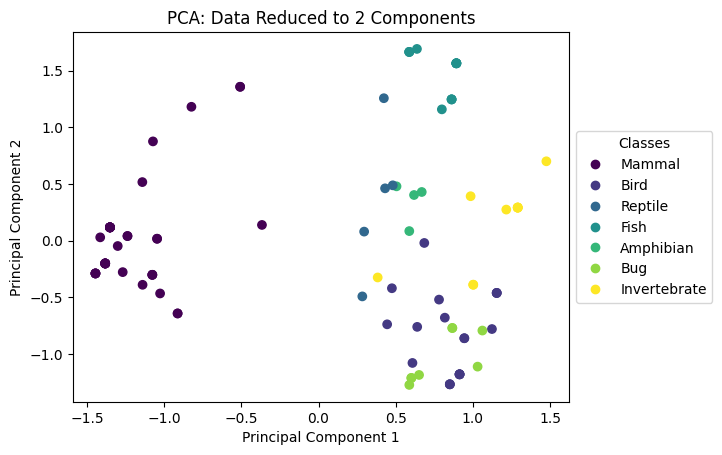

Explained variance by each component: [0.34764486 0.21997868]


In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA, reduce data to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data in 2D after PCA
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.values.flatten(), cmap='viridis')  # Convert 'y' to 1D array
plt.title('PCA: Data Reduced to 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a legend
handles, _ = scatter.legend_elements()
legend_labels = [class_names[i] for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Classes", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Explained variance ratio
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")


## t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a powerful non-linear dimensionality reduction technique, often used for visualization. It preserves the local structure of data (i.e., similar data points remain close to each other in the reduced space).

When to Use t-SNE:
- When you want to visualize complex, non-linear relationships in data.
- Best for reducing data to 2 or 3 dimensions for visualization purposes.
- Suitable for small to medium datasets, as it’s computationally expensive.

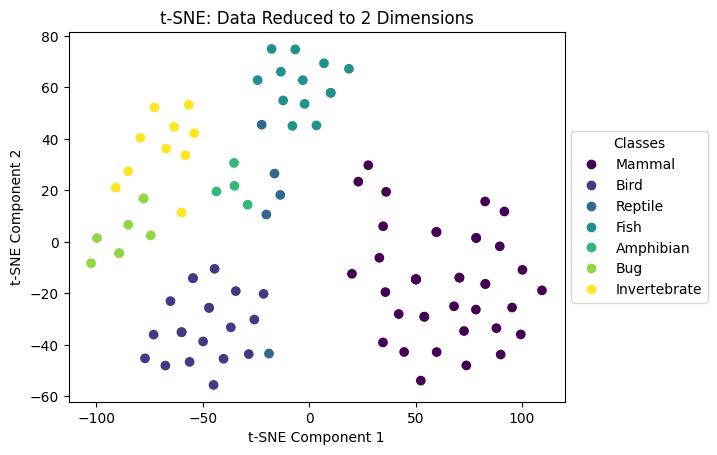

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialize t-SNE, reduce data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the data after t-SNE
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.values.flatten(), cmap='viridis')
plt.title('t-SNE: Data Reduced to 2 Dimensions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Create a legend
handles, _ = scatter.legend_elements()
legend_labels = [class_names[i] for i in range(len(handles))]
plt.legend(handles, legend_labels, title="Classes", loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Statistical Analysis

## Exploratory Data Analysis (EDA)

In [43]:
# # Get basic statistics for numerical columns
# print(df.describe())

# # Check for missing values
# print(df.isnull().sum())

# # Visualize the distribution of a specific column
# sns.histplot(df['type'], kde=True)
# plt.title('Distribution of column_name')
# plt.show()

# # Pairplot for relationships between multiple features
# sns.pairplot(df)
# plt.show()

## Regression Analysis with Statsmodels

ensures that the model will be unbiased, in other words, the mean of the residuals will be zero. By including a constant, one degree of freedom for error will be lost, but it's a small price to pay for the protection against bias.

The constant term in a regression model, often referred to as the intercept, serves several important purposes:

1. **Baseline Value**: The constant term represents the expected value of the dependent variable when all the independent variables are equal to zero. It provides a baseline or starting point for the regression equation.

2. **Adjustment for Mean**: Including a constant term ensures that the model can adjust for the mean of the dependent variable. Without it, the regression line would be forced to pass through the origin (0,0), which is often unrealistic and can lead to biased estimates of the coefficients.

3. **Capturing Unobserved Factors**: The constant term can capture the effect of factors that are not included in the model. These could be variables that are difficult to measure or omitted due to lack of data.

4. **Improving Model Fit**: Including a constant term generally improves the fit of the model by allowing it to better align with the data points. This can lead to more accurate predictions and a higher R-squared value.

In the context of the provided OLS regression results, the constant term has a coefficient of 5.1828, which means that when all the predictor variables are zero, the expected value of the dependent variable "type" is 5.1828. This term is statistically significant with a p-value of 0.000, indicating that it plays an important role in the model.

In [49]:
import statsmodels.api as sm

X = sm.add_constant(X)  # Adds a constant term to the model

# Fit the model
model = sm.OLS(y, X).fit()

# Summary of the regression model
print(model.summary())
X.drop('const', axis=1, inplace=True)  # Drop the constant term

                            OLS Regression Results                            
Dep. Variable:                   type   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     290.1
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.35e-66
Time:                        16:09:18   Log-Likelihood:                -14.357
No. Observations:                 101   AIC:                             62.71
Df Residuals:                      84   BIC:                             107.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1828      0.276     18.752      0.0

The active selection is a detailed output from an Ordinary Least Squares (OLS) regression analysis, which is a method used to model the relationship between a dependent variable and one or more independent variables.
In this case, the dependent variable is labeled "type."

The top section of the output provides an overview of the model's performance.
The R-squared value is 0.982, indicating that approximately 98.2% of the variability in the dependent variable can be explained by the model.
The adjusted R-squared value, which adjusts for the number of predictors in the model, is 0.979.
The F-statistic is 290.1 with a p-value of 2.35e-66, suggesting that the model is statistically significant.

The table in the middle lists the coefficients for each predictor variable along with their standard errors, t-statistics, p-values, and 95% confidence intervals. For example, the coefficient for "hair" is -0.3216, with a standard error of 0.178, a t-statistic of -1.805, and a p-value of 0.075.
This suggests that "hair" is not statistically significant at the 5% level.
In contrast, "feathers" has a coefficient of -1.0237, a standard error of 0.277, a t-statistic of -3.698, and a p-value of 0.000, indicating it is highly significant.

The bottom section includes diagnostic statistics for the model.
The Omnibus test and its p-value assess the normality of the residuals, with a p-value of 0.005 indicating potential non-normality.
The Durbin-Watson statistic is 2.230, which tests for autocorrelation in the residuals.
The Jarque-Bera test and its p-value also test for normality, with a p-value of 8.63e-07 suggesting non-normality.
Skewness and kurtosis provide additional information about the distribution of the residuals.
The condition number of 41.8 indicates potential multicollinearity issues, with higher values suggesting more severe multicollinearity.

Overall, this output provides a comprehensive summary of the regression analysis, including the significance of each predictor and various diagnostic tests to assess the model's validity.

# Neural Net Aproach

## Research

[TensorFlow - Tutorial: Basic Classification](https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br)
- this part of the topic was inspired on this tutorial

### Other Links
[TensorFlow: Google CodeLabs](https://codelabs.developers.google.com/codelabs/tfjs-training-classfication/index.html#4)

[DigitalOcean: Recognize Handwritten Digits](https://www.digitalocean.com/community/tutorials/how-to-build-a-neural-network-to-recognize-handwritten-digits-with-tensorflow#step-3-defining-the-neural-network-architecture)

[Kaggle: MNIST Digits Classification](https://www.kaggle.com/code/smtkmr102/mnist-data-classification-using-ann)

[Kaggle: Reference for Model structure and planning](https://www.kaggle.com/competitions/nfl-big-data-bowl-2020/discussion/119400)

## model & training

In [34]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(16,)),             # Input layer with 16 neurons
    tf.keras.layers.Dense(16, activation='relu'),   # Hidden layer with 16 neurons and ReLU activation
    tf.keras.layers.Dense(7, activation="softmax")  # Output layer with 7 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Define your input and output data
# Convert the data into NumPy arrays
input_data = np.array(X)
output_data = np.array(y)

# Train the model
history = model.fit(input_data, output_data, epochs=100)  # You can adjust the number of epochs as needed

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0521 - loss: 2.2251  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0436 - loss: 2.1726     
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1223 - loss: 2.1018 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1365 - loss: 2.0339 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1419 - loss: 1.9738 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1659 - loss: 1.9043 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1700 - loss: 1.8646 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3240 - loss: 1.8024 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 1.7570 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4393 - loss: 1.7062 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4395 - loss: 1.6739 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4611 

## Visualization

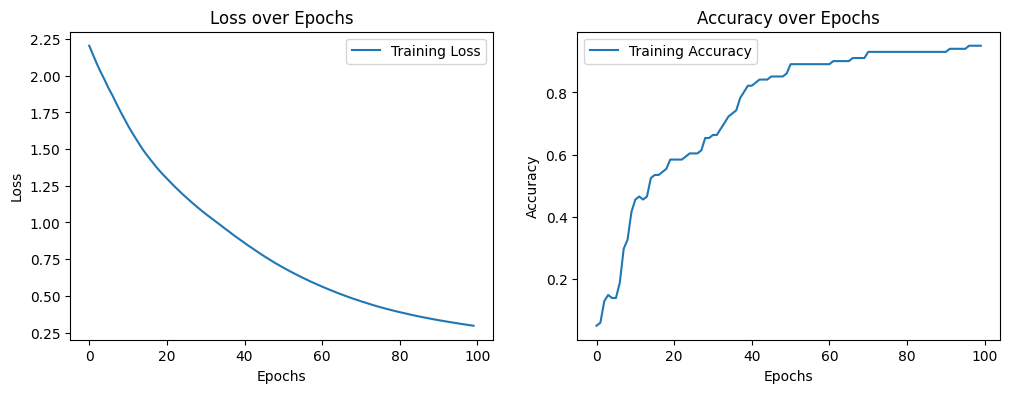

In [35]:
# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

1/1 - 0s - 110ms/step - accuracy: 1.0000 - loss: 0.1489

Test accuracy: 1.0


In [37]:
# Create a probability model by adding a softmax layer to the existing model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [38]:
predictions = probability_model.predict(X_test)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([0.12160849, 0.1207269 , 0.1239217 , 0.120831  , 0.1237556 ,
       0.1279472 , 0.2612091 ], dtype=float32)

In [39]:
np.argmax(predictions[0])
y_test.iloc[0]

type    6
Name: 46, dtype: int64

In [40]:
def plot_characteristics(i:int, predictions_array:np.ndarray, true_label:pd.DataFrame, data:pd.DataFrame) -> None:
    """
    Plot the characteristics of the animal and its predicted and true labels.

    Args:
        i: Index of the animal in the dataset
        predictions_array: Array of predictions runned by the model indicating the probability of each class
        true_label: DataFrame containing the True label of the animal
        data: DataFrame containing the characteristics of the animals

    Returns:
        None
    """
    true_label = true_label.iloc[i].values[0]
    characteristics = data.iloc[i]
    print(characteristics)
    predicted_label = np.argmax(predictions_array) # returns the index of the maximum value in the array
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    print(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})")

def plot_value_array(i:int, predictions_array:np.ndarray, true_label:pd.DataFrame) -> None:
    """
    Plot the probability of each class for the animal.

    Args:
        i: Index of the animal in the dataset
        predictions_array: Array of predictions runned by the model indicating the probability of each class
        true_label: DataFrame containing the True label of the animal

    Returns:
        None
    """
    true_label = true_label.iloc[i].values[0]
    plt.grid(False)
    plt.xticks(range(7))
    plt.yticks([])
    thisplot = plt.bar(range(7), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.title(f"{df['animal_name'].iloc[y_test.index[i]]} - {class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})")

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

gorilla
hair        1
feathers    0
eggs        0
milk        1
airborne    0
aquatic     0
predator    0
toothed     1
backbone    1
breathes    1
venomous    0
fins        0
legs        1
tail        0
domestic    0
catsize     1
Name: 32, dtype: int32
Mammal 30% (Mammal)


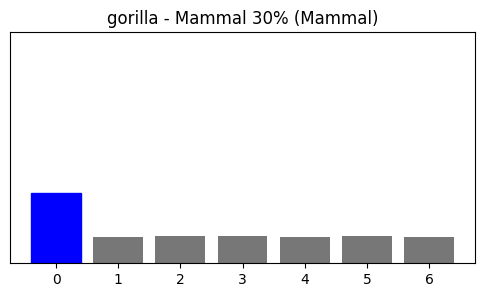

In [41]:
i = 1
print(df["animal_name"].iloc[y_test.index[i]])
plot_characteristics(i, predictions[i], y_test, X_test)
plt.figure(figsize=(6,3))
plot_value_array(i, predictions[i],  y_test)
plt.show()

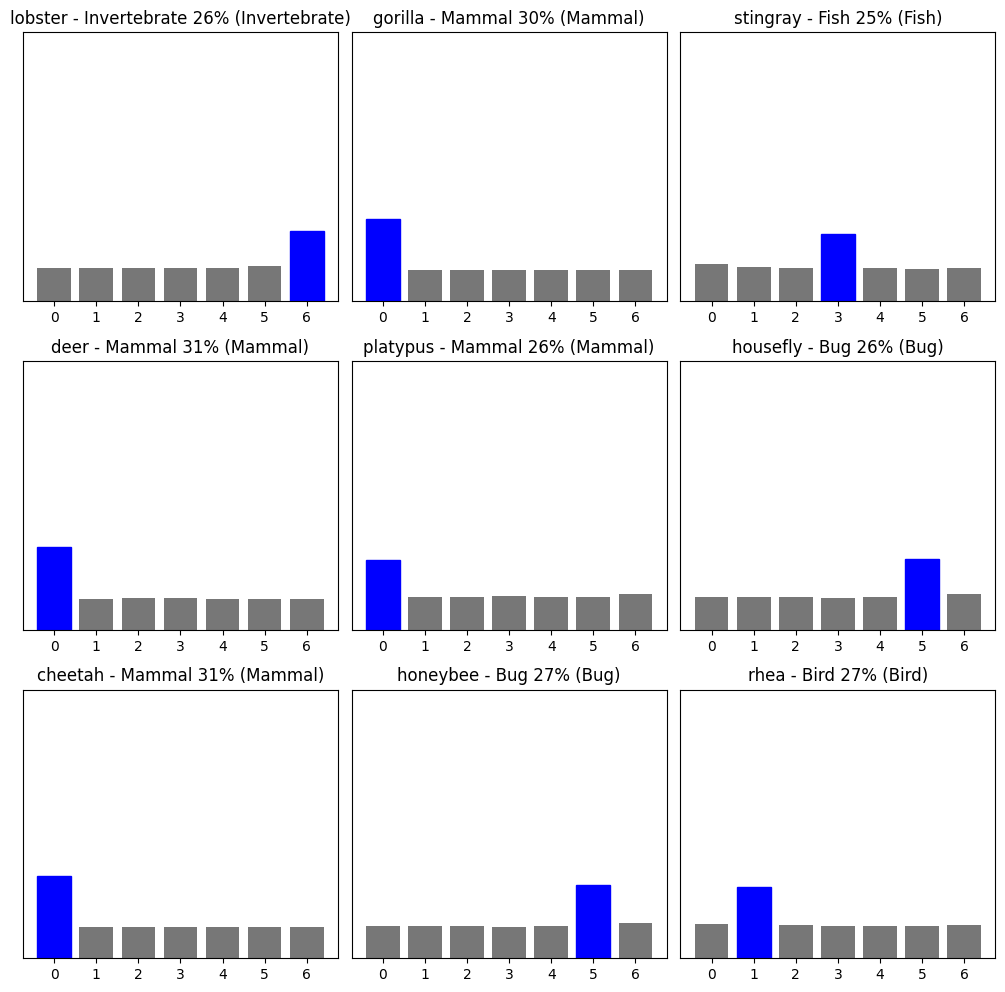

In [42]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(10, 10))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout(pad=1)
plt.show()

# Artificial Imunologic Aproach

Considering the set "self" as being that of animals of Class 1 (mammals) and as "non-self" the animals of the other classes,<br>
use a Negative Binary Selection algorithm to generate a set of 1000 detectors,<br>
using different layer limits and using the function 𝑎,<br>
described below, as a surface layer function.<br>

$$
a(x, y) = \frac{16 - \text{HammingDistance}(x, y)}{16}
$$

## Research

“There is probably no system, living or manmade, that can protect itself as effectively, on <br>
so many levels, and from so many different diseases and infections as the human immune <br>
system.” <br>
(N. Forbes, Imitation of Life: How Biology is Inspiring Computing, MIT Press, 2004; p. 98)

Immunological computation is a subfield of artificial intelligence that draws inspiration from the immune system to develop algorithms and models. The immune system is a complex biological system that is responsible for identifying and neutralizing foreign substances in the body. Immunological computation seeks to replicate the behavior of the immune system in software, with the goal of developing algorithms that can solve complex problems.

Artificial immune system (AIS) algorithms have a wide range of applications in various fields. Here are some examples:

1. Anomaly detection: AIS algorithms can be used to detect anomalies in data, such as fraud detection in financial transactions or intrusion detection in computer networks.

2. Optimization: AIS algorithms can be used to optimize complex systems, such as supply chain management or transportation logistics.

3. Robotics: AIS algorithms can be used to control the behavior of robots, such as swarm robotics or autonomous navigation.

4. Bioinformatics: AIS algorithms can be used to analyze biological data, such as DNA sequencing or protein structure prediction.

5. Image processing: AIS algorithms can be used for image processing tasks, such as image segmentation or object recognition.

Artificial immune system (AIS) algorithms have several advantages over other machine learning algorithms:

1. Robustness: AIS algorithms are inherently robust to noise and outliers in the data, which makes them well-suited for real-world applications where data can be noisy or incomplete.

2. Adaptability: AIS algorithms are able to adapt to changing environments and can learn from new data in real-time, which makes them well-suited for dynamic systems.

3. Diversity: AIS algorithms are able to maintain a diverse population of solutions, which helps to prevent premature convergence and can lead to better overall performance.

4. Explainability: AIS algorithms are often more interpretable than other machine learning algorithms, which makes them well-suited for applications where understanding the reasoning behind a decision is important.

5. Scalability: AIS algorithms are able to scale to large datasets and high-dimensional feature spaces, which makes them well-suited for big data applications.

While artificial immune system (AIS) algorithms have several advantages, they also have some limitations:

1. Computational complexity: AIS algorithms can be computationally expensive, especially for large datasets or high-dimensional feature spaces.

2. Parameter tuning: AIS algorithms have several parameters that need to be tuned, such as the population size, mutation rate, and selection method. Finding the optimal values for these parameters can be challenging and time-consuming.

3. Lack of theoretical foundation: AIS algorithms are still a relatively new area of research, and there is a lack of theoretical foundation to guide their development and analysis.

4. Limited performance on some tasks: While AIS algorithms can perform well on certain types of problems, they may not be the best choice for all tasks. For example, deep learning algorithms may be better suited for image recognition tasks.

5. Limited interpretability: While AIS algorithms are often more interpretable than other machine learning algorithms, they can still be difficult to interpret in some cases, especially when dealing with complex data.

There are several examples of anomaly detection using artificial immune system (AIS) algorithms. Here are a few:

1. Network intrusion detection: AIS algorithms can be used to detect network intrusions by analyzing network traffic and identifying patterns that are indicative of an attack.

2. Fraud detection: AIS algorithms can be used to detect fraudulent transactions by analyzing patterns in transaction data and identifying transactions that are anomalous.

3. Medical diagnosis: AIS algorithms can be used to diagnose medical conditions by analyzing patient data and identifying patterns that are indicative of a particular condition.

4. Manufacturing quality control: AIS algorithms can be used to detect defects in manufacturing processes by analyzing sensor data and identifying patterns that are indicative of a defect.

There are several examples of robotics applications using artificial immune system (AIS) algorithms. Here are a few:

1. Swarm robotics: AIS algorithms can be used to control the behavior of swarms of robots, such as coordinating the movement of a group of drones or robots to perform a task.

2. Autonomous navigation: AIS algorithms can be used to help robots navigate in complex environments, such as avoiding obstacles or finding the optimal path to a destination.

3. Robot learning: AIS algorithms can be used to help robots learn from their environment and adapt to changing conditions, such as learning to recognize objects or perform tasks.

4. Human-robot interaction: AIS algorithms can be used to help robots interact with humans in a more natural and intuitive way, such as recognizing speech or gestures.

O Algoritmo de Seleção Binária Negativa (Negative Selection Algorithm - NSA) é inspirado no sistema imunológico natural, em particular na capacidade do corpo de distinguir entre células "self" (próprias) e "non-self" (estranhas). Aplicando esse conceito, o objetivo do problema é gerar detectores que identifiquem padrões "non-self", ou seja, padrões que não pertencem ao conjunto de interesse (classe 1).



## Data

In [63]:
binary_df.head(1) # antes da normaização das classe, type - 1

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,1


In [64]:
X.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1


In [65]:
y.head(1)

,type
0,0


In [66]:
indexes_self = y[y['type'] == 0].index
indexes_non_self = y[y['type'] != 0].index

In [67]:
X.iloc[indexes_self]
# X.iloc[indexes_non_self]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1
9,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0
10,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1
17,1,0,0,1,0,0,0,1,1,1,0,0,1,1,0,1
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1


In [68]:
len(X.iloc[indexes_self])

41

In [69]:
class_names

{0: 'Mammal',
 1: 'Bird',
 2: 'Reptile',
 3: 'Fish',
 4: 'Amphibian',
 5: 'Bug',
 6: 'Invertebrate'}

## Classes - Agents to be implemented

In [70]:
from abc import ABC, abstractmethod
import random

In [71]:
def hamming_distance(u:np.ndarray, v:np.ndarray) -> int:
    """
    Calculate the Hamming distance between two vectors. The Hamming distance is the number of positions at which the corresponding elements are different.

    Args:
        u: First vector
        v: Second vector

    Returns:
        distance(int): The Hamming distance between the two vectors
    """
    if len(u) != len(v): # Corner case. If the vectors are of different lengths, raise an error.
        raise ValueError("Vectors must be of the same length")

    distance = 0
    for x, y in zip(u, v):
        if x != y:
            distance += 1

    return distance

# Example usage
u = np.array([1, 0, 1, 1, 0, 1, 0, 1]) # str1 = "karolin"
v = np.array([1, 0, 1, 1, 1, 0, 0, 1]) # str2 = "kathrin"
print(hamming_distance(u, v))  # Output: 2

# from scipy.spatial import distance
# distance.hamming(u, v)

2


In [72]:
class Cells(ABC):
    """
    Abstract class for the cells in the immune system. The cells have a name for identification and a data attribute that stores the characteristics of the cell.
    """
    @abstractmethod
    def __init__(self, name:str, data:np.ndarray) -> None:
        """
        Initialize the cell with a name and data.

        Attributes:
            name(str): The name of the cell
            data(np.ndarray): The characteristics of the cell
        """
        self.name = name
        self.data = data
        pass

In [73]:
class Antibody(Cells):
    """
    Antibody Representation: The solution to the problem is represented as antibodies. These are the immune cells that respond to the antigens.
    """
    def __init__(self, solution) -> None:
        super().__init__()
        self.solution = solution
        self.affinity = 0
        self.memory = []

    def mutate(self):
        # Implement mutation logic here
        pass

In [74]:
class Antigen(Cells):
    """
    Antigen Representation: The problem to be solved is represented as antigens. These are the inputs that the immune system will respond to.
    """
    def __init__(self) -> None:
        super().__init__()
        self.detected = []

    def add_detected(self, cell:Cells) -> None:
        self.detected.append(cell)

In [75]:
class AIS:
    """Artificial immune system (AIS) algorithm."""
    def __init__(self, antigen_data, population_size=100) -> None:
        self.antigen = Antigen(antigen_data)
        self.population_size = population_size
        self.population:list[Antibody] = self.initialize_population()

    def initialize_population(self) -> list:
        return [Antibody(self.random_solution()) for _ in range(self.population_size)]

    def random_solution(self) -> np.ndarray:
        # Generate a random solution
        return random.choices(range(2), k=16)  # Example solution

    def measure_affinity(self, antibody:Antibody) -> None:
        """
        Affinity Measure: A function to measure the similarity or fitness between antigens and antibodies. This is often analogous to the concept of fitness in genetic algorithms.
        """
        # Implement affinity measurement logic
        # Example: inverse of the sum of differences
        antibody.affinity = 1 / (1 + sum(abs(a - b) for a, b in zip(self.antigen.data, antibody.solution)))

    def clonal_selection(self) -> list:
        """
        Clonal Selection: A process inspired by the biological immune system where antibodies that better match the antigens are selected and cloned. These clones are then subjected to mutation to introduce diversity.
        """
        # Implement clonal selection logic
        sorted_population = sorted(self.population, key=lambda ab: ab.affinity, reverse=True)
        return sorted_population[:self.population_size // 2]

    def hypermutation(self, clones):
        """
        Hypermutation: A process where the cloned antibodies undergo mutation at a higher rate. This helps in exploring the solution space more thoroughly.
        """
        # Implement hypermutation logic
        for clone in clones:
            clone.mutate()

    def negative_selection(self):
        """
        Negative Selection: A process to eliminate antibodies that react to self-antigens (undesirable solutions). This helps in maintaining the quality of the solution pool.
        """
        # Implement negative selection logic
        pass

    def run(self, generations:int=100):
        # Main loop of the AIS algorithm
        for generation in range(generations):
            # Measure affinity for each antibody
            for antibody in self.population:
                self.measure_affinity(antibody)

            # Clonal selection
            clones = self.clonal_selection()

            # Hypermutation
            self.hypermutation(clones)

            # Replace the worst half of the population with clones
            self.population[self.population_size // 2:] = clones

            # Negative selection (optional)
            self.negative_selection()

            # Optionally, store the best solution found so far
            best_solution = max(self.population, key=lambda ab: ab.affinity)
            print(f"Generation {generation}: Best affinity = {best_solution.affinity}")

        return best_solution

In [76]:
# if __name__ == "__main__":
#     # Example antigen data
#     antigen_data = [random.randint(0, 100) for _ in range(10)]

#     # Initialize the AIS algorithm
#     ais = AIS(antigen_data, population_size=100)

#     # Run the AIS algorithm
#     best_solution = ais.run(generations=100)

#     # Print the best solution found
#     print("Best solution found:", best_solution.solution)
#     print("Best solution affinity:", best_solution.affinity)

## Implementation

In [77]:
import random

def random_string(length):
    """Generate a random binary string of given length."""
    return ''.join(random.choice('01') for _ in range(length))

def affinity(r0, s):
    """Calculate the affinity between two strings (e.g., Hamming distance)."""
    return sum(1 for a, b in zip(r0, s) if a == b) / len(r0)

def NSA_censor(S, epsilon, N, L):
    """
    Negative Selection Algorithm to generate a set of detectors.
    
    Parameters:
    S (list of str): Set of self strings.
    epsilon (float): Affinity threshold.
    N (int): Number of detectors to generate.
    L (int): Length of each detector string.
    
    Returns:
    list of str: Set of detectors.
    """
    R = []
    t = 1
    while t <= N:
        r0 = random_string(L)
        flag = 0
        for s in S:
            aff = affinity(r0, s)
            if aff >= epsilon:
                flag = 1
                break
        if flag == 0:
            R.append(r0)
            t += 1
    return R

# Example usage
S = ['1100', '1010', '1001']  # Example self set
epsilon = 0.75  # Affinity threshold
N = 5  # Number of detectors to generate
L = 4  # Length of each detector string

detectors = NSA_censor(S, epsilon, N, L)
print("Generated detectors:", detectors)

Generated detectors: ['0101', '1111', '0111', '0111', '0011']


In [78]:
def NSA_monitor(S_star, R, epsilon):
    """
    Monitor for non-self elements using the set of detectors.
    
    Parameters:
    S_star (list of str): Set of non-self strings.
    R (list of str): Set of detectors.
    epsilon (float): Affinity threshold.
    
    Returns:
    str: Detection flag ("nonself detected" or "no nonself detected").
    """
    for s in S_star:
        for r in R:
            aff = affinity(r, s)
            if aff >= epsilon:
                return f"nonself detected. {s} is detected by {r}"
    return "no nonself detected"

# Example usage
S_star = ['0110', '0011', '1111']  # Example non-self set
R = ['1000', '0101', '0010', '0001', '1110']  # Example detectors
R = detectors
epsilon = 0.75  # Affinity threshold

flag = NSA_monitor(S_star, R, epsilon)
print("Detection flag:", flag)

Detection flag: nonself detected. 0110 is detected by 0111


In [79]:
# Example usage - testing the NSA algorithm
S = X.iloc[indexes_self].values.copy()  # Example self set
S = S[:20]
epsilon = 0.96  # Affinity threshold
N = 10  # Number of detectors to generate
L = len(S[0])  # Length of each detector string

detectors = NSA_censor(S, epsilon, N, L) # Example detectors
print("Generated detectors:", detectors)
S_star = X.iloc[indexes_non_self].values.copy()  # Example non-self set

flag = NSA_monitor(S_star, detectors, epsilon)
print("Detection flag:", flag)

Generated detectors: ['0001110000011010', '0101101000101010', '0111110000100101', '0100110101100011', '0101011110111001', '0001001110100100', '1110110010100100', '1000001110010001', '1101011110001101', '0011111110111100']
Detection flag: no nonself detected
